In [1]:
import waveform as wf
import matplotlib.pyplot as plt
import numpy as np
import dataprocess as dp
import fishermatrix as fm
import pandas as pd
from tqdm import tqdm

plt.rcParams['font.family'] = 'Times new roman'  # 设置字体为 Arial
plt.rcParams['font.size'] = 12        # 设置字体大小为 12
plt.rcParams['figure.figsize'] = [8, 6]
#plt.rcParams['font.style'] = 'italic'
#plt.rcParams['font.weight'] = 'bold'   # 设置字体加粗

pi = np.pi

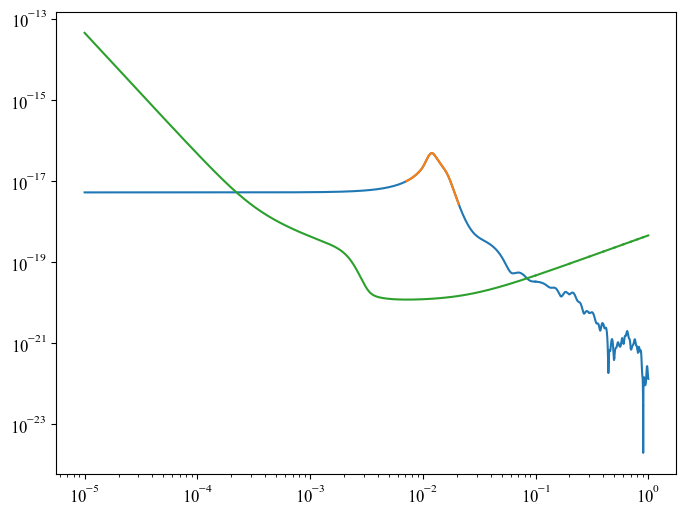

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


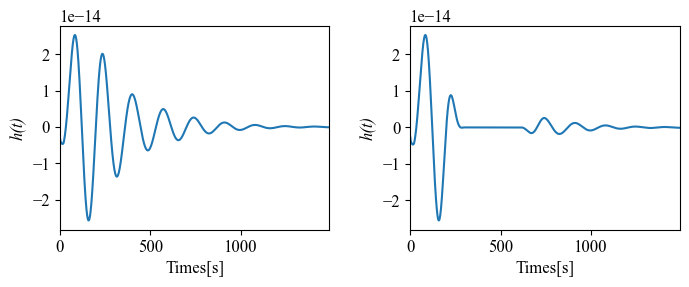

1489.663186094537
189.66980768717403
189.66980768717403


In [4]:
freq = np.arange(1e-5,1,1e-5)
mass = 1e6
m_ratio = 2
rd_para = [mass,m_ratio,1]
thetad = 1.17662
psid = -0.873302
phid = -0.615727
rd_ang = [thetad,psid,phid]
rd_sf = wf.sfa(freq,rd_para,rd_ang,'ls')
f_in = wf.fin(mass,m_ratio)
f_out = wf.fout(mass,m_ratio)
freq_rd = np.arange(f_in,f_out,1e-5)
plt.plot(freq,np.abs(rd_sf))
plt.plot(freq_rd,np.abs(wf.sfa(freq_rd,rd_para,rd_ang,'ls')))
plt.plot(freq,np.sqrt(wf.PSD_ls(freq)))
plt.xscale('log')
plt.yscale('log')
plt.show()
rd_st = dp.Freq_ifft(rd_sf)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(rd_st)
plt.xlim(0,2.5*pi*dp.qnm_t4(rd_para))
plt.xlabel('Times[s]')
plt.ylabel('h(t)', fontdict={'fontstyle': 'italic'})


win_rdst = dp.win(2.5*pi*dp.qnm_t4(rd_para),rd_st,0.3)

plt.subplot(1,2,2)
plt.plot(win_rdst)
plt.xlim(0,2.5*pi*dp.qnm_t4(rd_para))
plt.xlabel('Times[s]')
plt.ylabel('h(t)', fontdict={'fontstyle': 'italic'})
plt.subplots_adjust(wspace=0.3, bottom=0.2) 
plt.savefig("C:/Users/indigo/Desktop/paper/my own/spin_plots/time_sig_gap.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/spin_plots/time_sig_gap.png")
plt.show()

print(2.5*pi*dp.qnm_t4(rd_para))
print(dp.qnm_t4(rd_para))
print(dp.qnm_t4(rd_para))


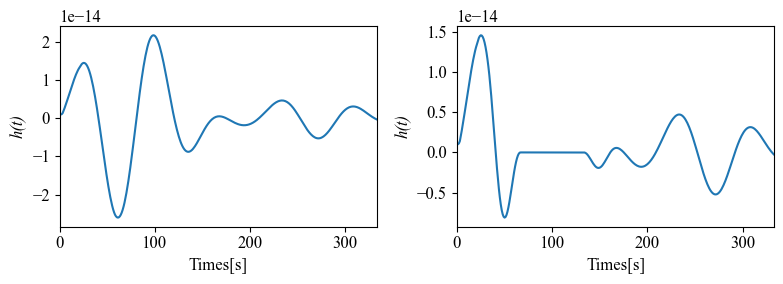

333.0323468348262


In [4]:
rd_st = dp.Freq_ifft(rd_sf)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(rd_st)
plt.xlim(0,2*pi*dp.qnm_t4(rd_para))
plt.xlabel('Times[s]')
plt.ylabel('h(t)', fontdict={'fontstyle': 'italic'})


win_rdst = dp.win(2*pi*dp.qnm_t4(rd_para),rd_st,0.3)

plt.subplot(1,2,2)
plt.plot(win_rdst)
plt.xlim(0,2*pi*dp.qnm_t4(rd_para))
plt.xlabel('Times[s]')
plt.ylabel('h(t)', fontdict={'fontstyle': 'italic'})
plt.subplots_adjust(wspace=0.3, bottom=0.2) 
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/time_sig_gap.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/time_sig_gap.png")
plt.tight_layout()
plt.show()

print(2*pi*dp.qnm_t4(rd_para))

In [5]:
freq_arr = np.arange(1e-4,1,1e-5)
rd_para1 = [rem_mass,eta,red,s1,s2,rem_s]
rd_para2 = [1e5,2,1,-0.9]
win_rdsf_ls = wf.gap_sfa(freq_arr,rd_para1,rd_ang,0.2)
plt.plot(win_rdsf_ls[0],np.abs(win_rdsf_ls[1]),label = 'LISA Gapped',color = 'red',linestyle = '--')
plt.plot(win_rdsf_ls[0],np.abs(win_rdsf_ls[2]),label = 'LISA Optimal',color = 'red',linestyle = '-')
plt.plot(win_rdsf_ls[0],np.sqrt(wf.PSD_ls(win_rdsf_ls[0])),label = 'LISA Sensitivity Curve',color = 'red',linestyle = ':')

win_rdsf_tj = wf.gap_sfa(freq_arr,rd_para1,rd_ang,0.2,'tj')
plt.plot(win_rdsf_tj[0],np.abs(win_rdsf_tj[1]),label = 'TaiJi Gapped',color = 'blue',linestyle = '--')
plt.plot(win_rdsf_tj[0],np.abs(win_rdsf_tj[2]),label = 'TaiJi Optimal',color = 'blue',linestyle = '-')
plt.plot(win_rdsf_tj[0],np.sqrt(wf.PSD_tj(win_rdsf_tj[0])),label = 'TaiJi Sensitivity Curve',color = 'blue',linestyle = ':')

win_rdsf_tq = wf.gap_sfa(freq_arr,rd_para1,rd_ang,0.2,'tq')
plt.plot(win_rdsf_tq[0],np.abs(win_rdsf_tq[1]),label = 'TianQin Gapped',color = 'green',linestyle = '--')
plt.plot(win_rdsf_tq[0],np.abs(win_rdsf_tq[2]),label = 'TianQin Optimal',color = 'green',linestyle = '-')
plt.plot(win_rdsf_tq[0],np.sqrt(wf.PSD_tq(win_rdsf_tq[0])),label = 'TainQin Sensitivity Curve',color = 'green',linestyle = ':')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude Spectral Density [$Hz^{-1/2}$]', fontdict={'fontstyle': 'italic'})
plt.title('The spectrum corresponding to different detector')
plt.legend(bbox_to_anchor=(0.4,0.4))
plt.tight_layout()
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/freq_sig_rd.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/freq_sig_rd.png")
plt.show()


IndexError: index 99990 is out of bounds for axis 0 with size 99990

In [7]:

freq_arr = np.arange(1e-4,1,1e-5)
rd_para1 = [1e5,2,1]
rd_para2 = [1e6,2,1]
rd_para3 = [1e7,2,1]
rd_para4 = [1e6,6,1]
rd_para5 = [1e6,10,1]


para = [rd_para1,rd_para2,rd_para3,rd_para4,rd_para5]
#这里是对get_gap_sf这个函数的测试
rate = np.linspace(0,1,100)
snrlost_mass1 = []
snrlost_mass2 = []
snrlost_ratio1 = []
snrlost_ratio2 = []
snrlost_red1 = []
snrlost_red2 = []
snrlost_arr = [snrlost_mass1,snrlost_mass2,snrlost_ratio1,snrlost_ratio2,snrlost_red1]
delta_f = freq_arr[1] - freq_arr[0]
for mm in range(len(para)):
    snrlost = []
    rd_para_lost = para[mm]
    for nn in tqdm(range(len(rate))):

        posi = rate[nn]
        win_rdsf_ls = wf.gap_sfa(freq_arr,rd_para_lost,rd_ang,posi)
        gapfreq = win_rdsf_ls[0]
        gapsf = win_rdsf_ls[1]
        sffull = win_rdsf_ls[2]

        gpsnr = dp.SNR(gapsf,gapsf,wf.PSD_ls(gapfreq),delta_f)
        fullsnr = dp.SNR(sffull,sffull,wf.PSD_ls(gapfreq),delta_f)
        snrratio = np.abs((gpsnr-fullsnr)/fullsnr)
        snrlost.append(snrratio)
    snrlost_arr[mm] = snrlost[:]


100%|██████████| 100/100 [00:42<00:00,  2.37it/s]


In [9]:
print(snrlost_arr)

[[0.40272428258827736, 0.4701244433165067, 0.5351669098139861, 0.5937063467443099, 0.6417369007948078, 0.6814176414242389, 0.7158053443684081, 0.7437564434197379, 0.7628004751901326, 0.7597083050032539, 0.7047002348197242, 0.6077394024066951, 0.49298691583009385, 0.38596553577312726, 0.29307552825452465, 0.20682773867418003, 0.1442845074902816, 0.106319552965637, 0.07407909278534325, 0.051925421694617634, 0.04270763280980598, 0.03479707753696621, 0.025982636003470703, 0.019715215775464544, 0.015015517339696444, 0.010205877082959487, 0.006034021455344621, 0.0038360695982970865, 0.0027553775725149754, 0.001472687404471797, 0.00029088247071908736, 0.0006854866235490996, 0.0019832591790066973, 0.0036103723048097453, 0.005098208071094968, 0.006063713317802654, 0.006705632619522288, 0.007208947411939048, 0.007385856670356948, 0.0073934139332026945, 0.007514293405718026, 0.007725147398817305, 0.007962808166069936, 0.008192239440043094, 0.008394823209932366, 0.008540452017847283, 0.00857859283

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


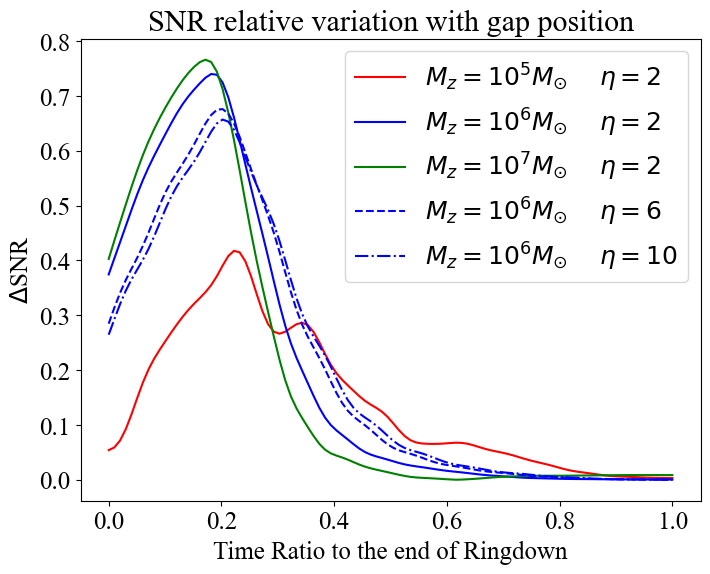

In [22]:
rate2 = np.linspace(0,1,100)
plt.rcParams['font.size'] = 18 

plt.plot(rate2,snrlost_arr[0],label = r'$M_z=10^5 M_{\odot}$     $\eta=2$',color = 'red')
plt.plot(rate2,snrlost_arr[1],label = r'$M_z=10^6 M_{\odot}$     $\eta= 2$',color = 'blue')
plt.plot(rate2,snrlost_arr[2],label = r'$M_z=10^7 M_{\odot}$     $\eta= 2$',color = 'green')
plt.plot(rate2,snrlost_arr[3],label = r'$M_z=10^6 M_{\odot}$     $\eta= 6$',linestyle = '--',color = 'blue')
plt.plot(rate2,snrlost_arr[4],label = r'$M_z=10^6 M_{\odot}$     $\eta= 10$',linestyle = '-.',color = 'blue')

plt.title('SNR relative variation with gap position')
plt.xlabel('Time Ratio to the end of Ringdown')
plt.ylabel(r'$\Delta$SNR')
plt.legend()
plt.savefig("C:/Users/indigo/Desktop/paper/my own/spin_plots/SNR relative variation.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/spin_plots/SNR relative variation.png")
plt.show()

In [6]:
Z = np.logspace(-1, 1.2, 30)
M = np.logspace(5, 8, 30)
ZZ, MM = np.meshgrid(Z, M)
gp_SNR_ls = np.zeros_like(ZZ)
full_SNR_ls = np.zeros_like(ZZ)
freq_coutour_ls = np.arange(1e-4,1,1e-5)
for i in tqdm(range(ZZ.shape[0])):
    for j in range(ZZ.shape[1]):
        para_coutour = [MM[i, j],2, ZZ[i, j]]
        sf_coutour = wf.gap_sfa(freq_coutour_ls,para_coutour,rd_ang,0.3)
        gpsf_coutour = sf_coutour[1]
        fullsf_coutour = sf_coutour[2]
        rd_freq_coutour = sf_coutour[0]
        gp_SNR_ls[i, j] = dp.SNR(gpsf_coutour, gpsf_coutour, wf.PSD_ls(rd_freq_coutour),1e-5)
        full_SNR_ls[i, j] = dp.SNR(fullsf_coutour, fullsf_coutour, wf.PSD_ls(rd_freq_coutour),1e-5)

100%|██████████| 30/30 [05:57<00:00, 11.92s/it]


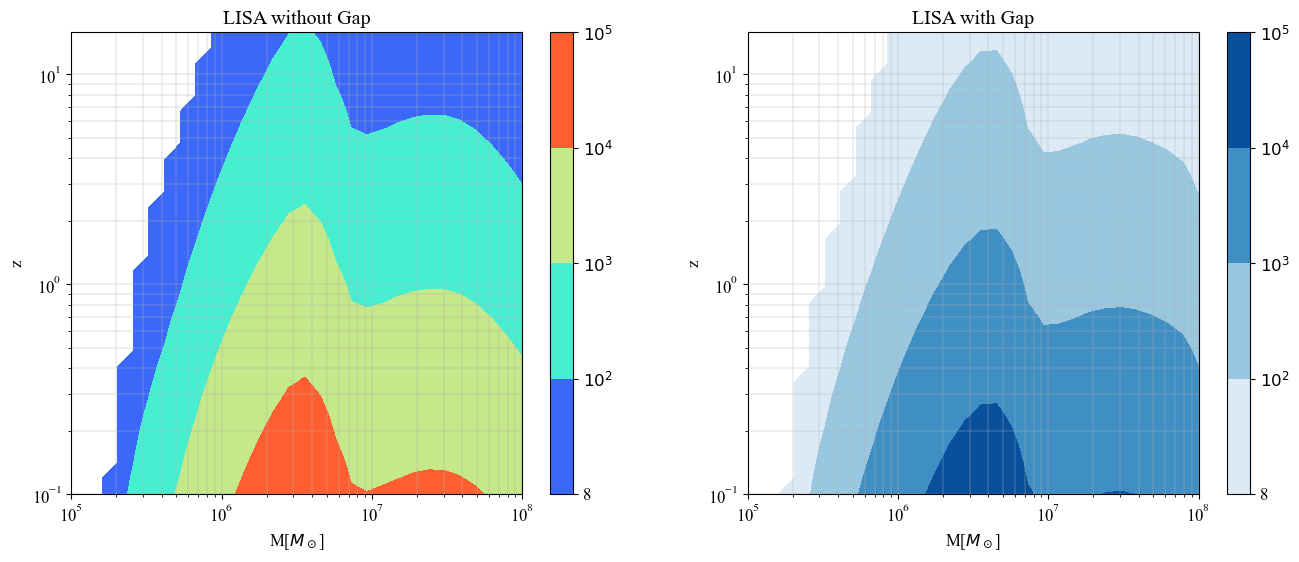

In [24]:

from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker
# 定义颜色映射和边界

#norm = mcolors.BoundaryNorm(bounds, cmap.N)

# 绘制等高线图
full_masked_ls = np.ma.masked_less(full_SNR_ls, 8)
gp_masked_ls = np.ma.masked_less(gp_SNR_ls, 8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

cmap = plt.cm.rainbow  # 使用你喜欢的颜色映射
#bounds = [8,10, 100, 1000, 10000,100000]
bounds = [8,100, 1000, 10000,100000]
cf1 = ax[0].contourf(MM, ZZ, full_masked_ls, levels=bounds, cmap=cmap, norm=LogNorm())
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'M[$M_\odot$]')
ax[0].set_ylabel('z')
ax[0].set_title('LISA without Gap')
ax[0].grid(True, which="both", linestyle='-', linewidth=0.3)
# 添加颜色条
cbar1 = fig.colorbar(cf1, ax=ax[0], format=mticker.LogFormatter())

# 设置颜色条的刻度和标签格式
#cbar1.set_ticks([8,1e1, 1e2, 1e3, 1e4, 1e5])
cbar1.set_ticks([8, 1e2, 1e3, 1e4, 1e5])
#cbar1.set_ticklabels([r'8',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])
cbar1.set_ticklabels([r'8', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])

# 将 10 到 8 之间的部分设置为单独的颜色（在上面已通过 `bounds` 实现）

#cmap = plt.cm.blues  # 使用你喜欢的颜色映射
#bounds = [8,10, 100, 1000, 10000,100000]
bounds = [8, 100, 1000, 10000,100000]
cf2 = ax[1].contourf(MM, ZZ, gp_masked_ls, levels=bounds, cmap=cmap, norm=LogNorm())
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'M[$M_\odot$]')
ax[1].set_ylabel('z')
ax[1].set_title('LISA with Gap')
ax[1].grid(True, which="both", linestyle='-', linewidth=0.3)
# 添加颜色条
cbar2 = fig.colorbar(cf2, ax=ax[1], format=mticker.LogFormatter())

# 设置颜色条的刻度和标签格式
#cbar2.set_ticks([8,1e1, 1e2, 1e3, 1e4, 1e5])
cbar2.set_ticks([8, 1e2, 1e3, 1e4, 1e5])
#cbar2.set_ticklabels([r'8',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])
cbar2.set_ticklabels([r'8', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/Lisa detection range.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/Lisa detection range.png")
# 显示图表
plt.show()


In [23]:
Z = np.logspace(-1, 1.2, 50)
M = np.logspace(5, 8, 50)
ZZ, MM = np.meshgrid(Z, M)
gp_SNR_tj = np.zeros_like(ZZ)
full_SNR_tj = np.zeros_like(ZZ)
freq_coutour_tj = np.arange(1e-4,1,1e-5)
for i in tqdm(range(ZZ.shape[0])):
    for j in range(ZZ.shape[1]):
        para_coutour = [MM[i, j],2, ZZ[i, j]]
        sf_coutour = wf.gap_sfa(freq_coutour_tj,para_coutour,rd_ang,0.15,'tj')
        gpsf_coutour = sf_coutour[1]
        fullsf_coutour = sf_coutour[2]
        rd_freq_coutour = sf_coutour[0]
        gp_SNR_tj[i, j] = dp.SNR(gpsf_coutour, gpsf_coutour, wf.PSD_tj(rd_freq_coutour),1e-5)
        full_SNR_tj[i, j] = dp.SNR(fullsf_coutour, fullsf_coutour, wf.PSD_tj(rd_freq_coutour),1e-5)

100%|██████████| 50/50 [19:20<00:00, 23.21s/it]


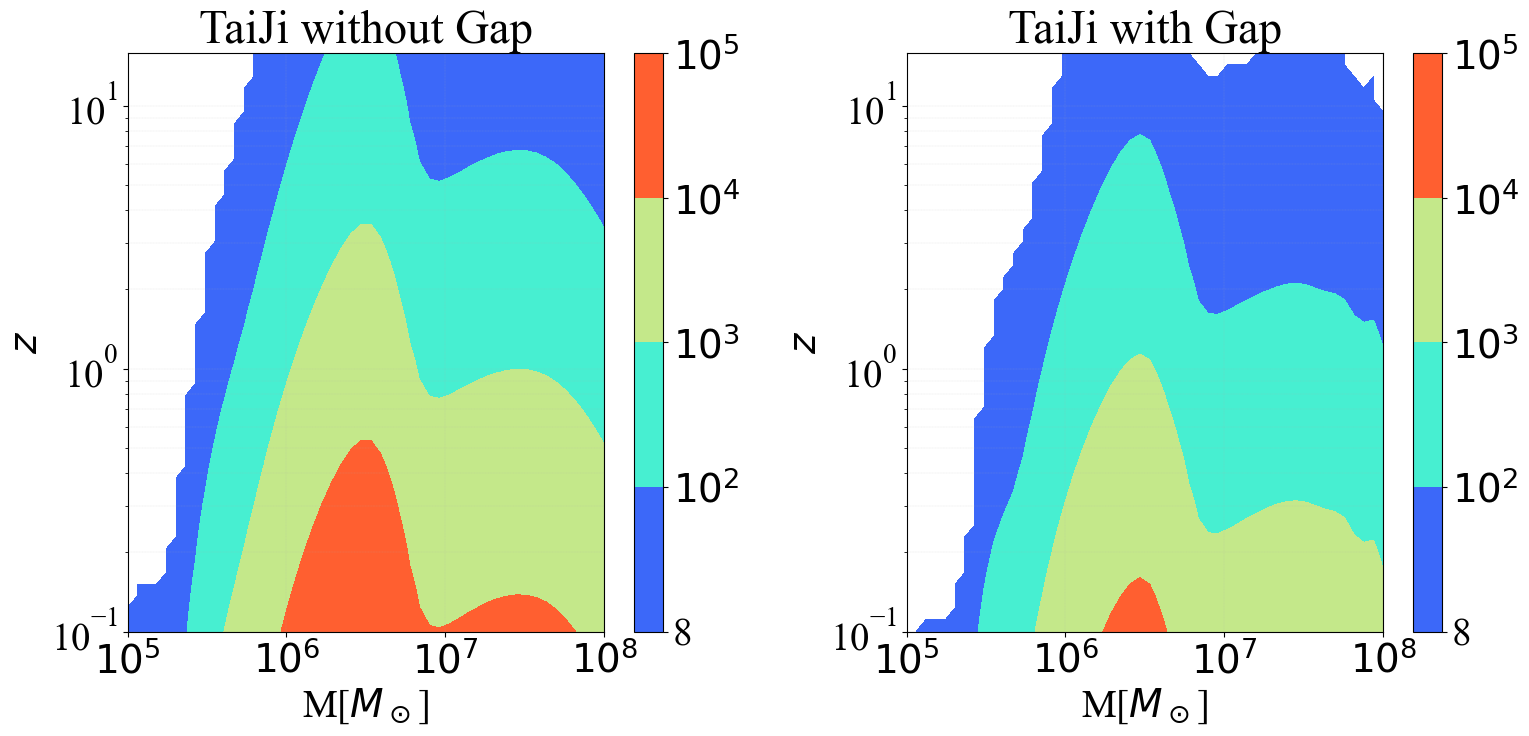

In [24]:
from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker
plt.rcParams['font.size'] = 28 


full_masked_tj = np.ma.masked_less(full_SNR_tj, 8)
gp_masked_tj = np.ma.masked_less(gp_SNR_tj, 8)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

cmap = plt.cm.rainbow  # 使用你喜欢的颜色映射
bounds = [8, 100, 1000, 10000,100000]
cf1 = ax[0].contourf(MM, ZZ, full_masked_tj, levels=bounds, cmap=cmap, norm=LogNorm())
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('M[$M_\odot$]')
ax[0].set_ylabel('$z$')
ax[0].set_title('TaiJi without Gap')
ax[0].set_xticks([1e5, 1e6, 1e7, 1e8])
ax[0].set_xticklabels([r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$'])
ax[0].grid(True, which="both", linestyle=':', linewidth=0.2)
# 添加颜色条
cbar1 = fig.colorbar(cf1, ax=ax[0], format=mticker.LogFormatter())

# 设置颜色条的刻度和标签格式
cbar1.set_ticks([8, 1e2, 1e3, 1e4, 1e5])
cbar1.set_ticklabels([r'8', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])

# 将 10 到 8 之间的部分设置为单独的颜色（在上面已通过 `bounds` 实现）

#cmap = plt.cm.blues  # 使用你喜欢的颜色映射
bounds = [8, 100, 1000, 10000,100000]
cf2 = ax[1].contourf(MM, ZZ, gp_masked_tj, levels=bounds, cmap=cmap, norm=LogNorm())
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('M[$M_\odot$]')
ax[1].set_ylabel('$z$')
ax[1].set_title('TaiJi with Gap')
ax[1].set_xticks([1e5, 1e6, 1e7, 1e8])
ax[1].set_xticklabels([r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$'])
ax[1].grid(True, which="both", linestyle=':', linewidth=0.2)
# 添加颜色条
cbar2 = fig.colorbar(cf2, ax=ax[1], format=mticker.LogFormatter())

# 设置颜色条的刻度和标签格式
cbar2.set_ticks([8, 1e2, 1e3, 1e4, 1e5])
cbar2.set_ticklabels([r'8',r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])
plt.tight_layout()
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/Taiji detection range.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/Taiji detection range.png")
# 显示图表

plt.show()

In [19]:
Z = np.logspace(-1, 1.2, 30)
M = np.logspace(5, 8, 30)
ZZ, MM = np.meshgrid(Z, M)
gp_SNR_tq = np.zeros_like(ZZ)
full_SNR_tq = np.zeros_like(ZZ)
freq_coutour_tq = np.arange(1e-4,1,1e-5)
for i in tqdm(range(ZZ.shape[0])):
    for j in range(ZZ.shape[1]):
        para_coutour = [MM[i, j],2, ZZ[i, j]]
        sf_coutour = wf.gap_sfa(freq_coutour_tq,para_coutour,rd_ang,0.3,'tq')
        gpsf_coutour = sf_coutour[1]
        fullsf_coutour = sf_coutour[2]
        rd_freq_coutour = sf_coutour[0]
        gp_SNR_tq[i, j] = dp.SNR(gpsf_coutour, gpsf_coutour, wf.PSD_tq(rd_freq_coutour),1e-5)
        full_SNR_tq[i, j] = dp.SNR(fullsf_coutour, fullsf_coutour, wf.PSD_tq(rd_freq_coutour),1e-5)

100%|██████████| 30/30 [07:27<00:00, 14.91s/it]


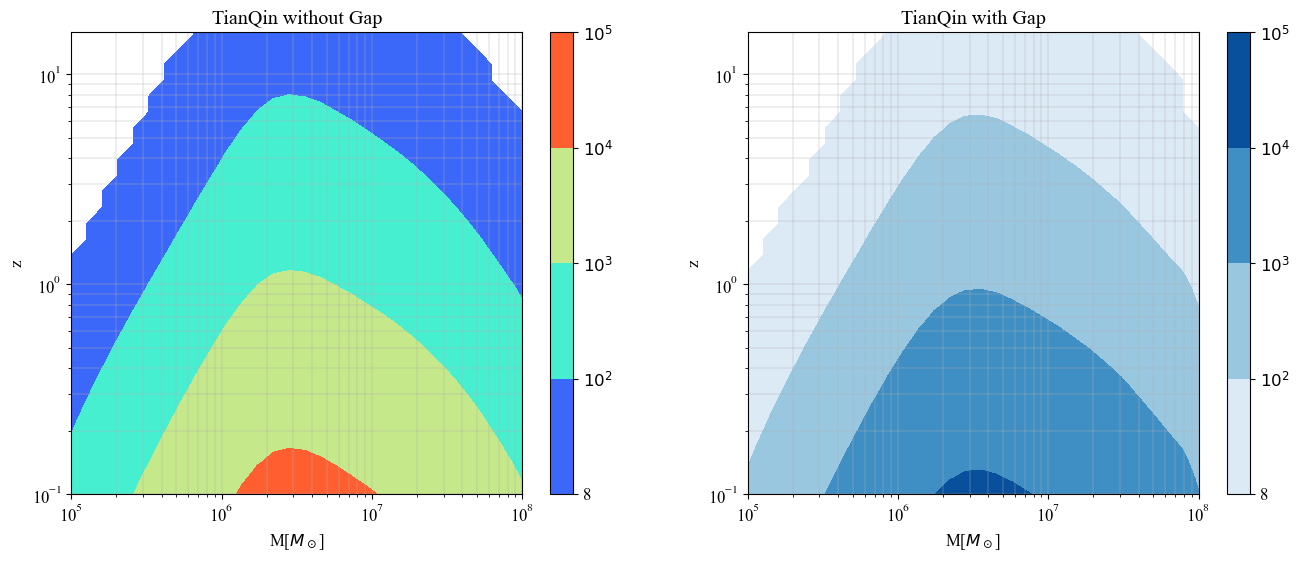

In [29]:
full_masked_tq = np.ma.masked_less(full_SNR_tq, 8)
gp_masked_tq = np.ma.masked_less(gp_SNR_tq, 8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

cmap = plt.cm.rainbow  # 使用你喜欢的颜色映射
bounds = [8, 100, 1000, 10000,100000]
cf1 = ax[0].contourf(MM, ZZ, full_masked_tq, levels=bounds, cmap=cmap, norm=LogNorm())
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('M[$M_\odot$]')
ax[0].set_ylabel('z')
ax[0].set_title('TianQin without Gap')
ax[0].grid(True, which="both", linestyle='-', linewidth=0.3)
# 添加颜色条
cbar1 = fig.colorbar(cf1, ax=ax[0], format=mticker.LogFormatter())

# 设置颜色条的刻度和标签格式
cbar1.set_ticks([8, 1e2, 1e3, 1e4, 1e5])
cbar1.set_ticklabels([r'8', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])

# 将 10 到 8 之间的部分设置为单独的颜色（在上面已通过 `bounds` 实现）

#cmap = plt.cm.blues  # 使用你喜欢的颜色映射
bounds = [8, 100, 1000, 10000,100000]
cf2 = ax[1].contourf(MM, ZZ, gp_masked_tq, levels=bounds, cmap='Blues', norm=LogNorm())
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('M[$M_\odot$]')
ax[1].set_ylabel('z')
ax[1].set_title('TianQin with Gap')
ax[1].grid(True, which="both", linestyle='-', linewidth=0.3)
# 添加颜色条
cbar2 = fig.colorbar(cf2, ax=ax[1], format=mticker.LogFormatter())

# 设置颜色条的刻度和标签格式
cbar2.set_ticks([8, 1e2, 1e3, 1e4, 1e5])
cbar2.set_ticklabels([r'8', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/Tianqin detection range.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/Tianqin detection range.png")
# 显示图表
plt.show()

In [25]:
Z = np.logspace(-1, 1.2, 20)
E = np.logspace(-2, -0.603, 20)
ZZ, EE = np.meshgrid(Z, E)
gp_SNR_tj_rt = np.zeros_like(ZZ)
full_SNR_tj_rt = np.zeros_like(ZZ)
freq_coutour_tj = np.arange(1e-4,1,1e-5)
for i in tqdm(range(ZZ.shape[0])):
    for j in range(ZZ.shape[1]):
        eta = EE[i,j]
        rd_q = (1-np.sqrt(1-4*eta)-2*eta)/(2*eta)
        para_coutour = [2*1e6,rd_q, ZZ[i, j]]
        sf_coutour = wf.gap_sfa(freq_coutour_tj,para_coutour,rd_ang,0.15,'tj')
        gpsf_coutour = sf_coutour[1]
        fullsf_coutour = sf_coutour[2]
        rd_freq_coutour = sf_coutour[0]
        gp_SNR_tj_rt[i, j] = dp.SNR(gpsf_coutour, gpsf_coutour, wf.PSD_tj(rd_freq_coutour),1e-5)
        full_SNR_tj_rt[i, j] = dp.SNR(fullsf_coutour, fullsf_coutour, wf.PSD_tj(rd_freq_coutour),1e-5)

100%|██████████| 20/20 [03:24<00:00, 10.23s/it]


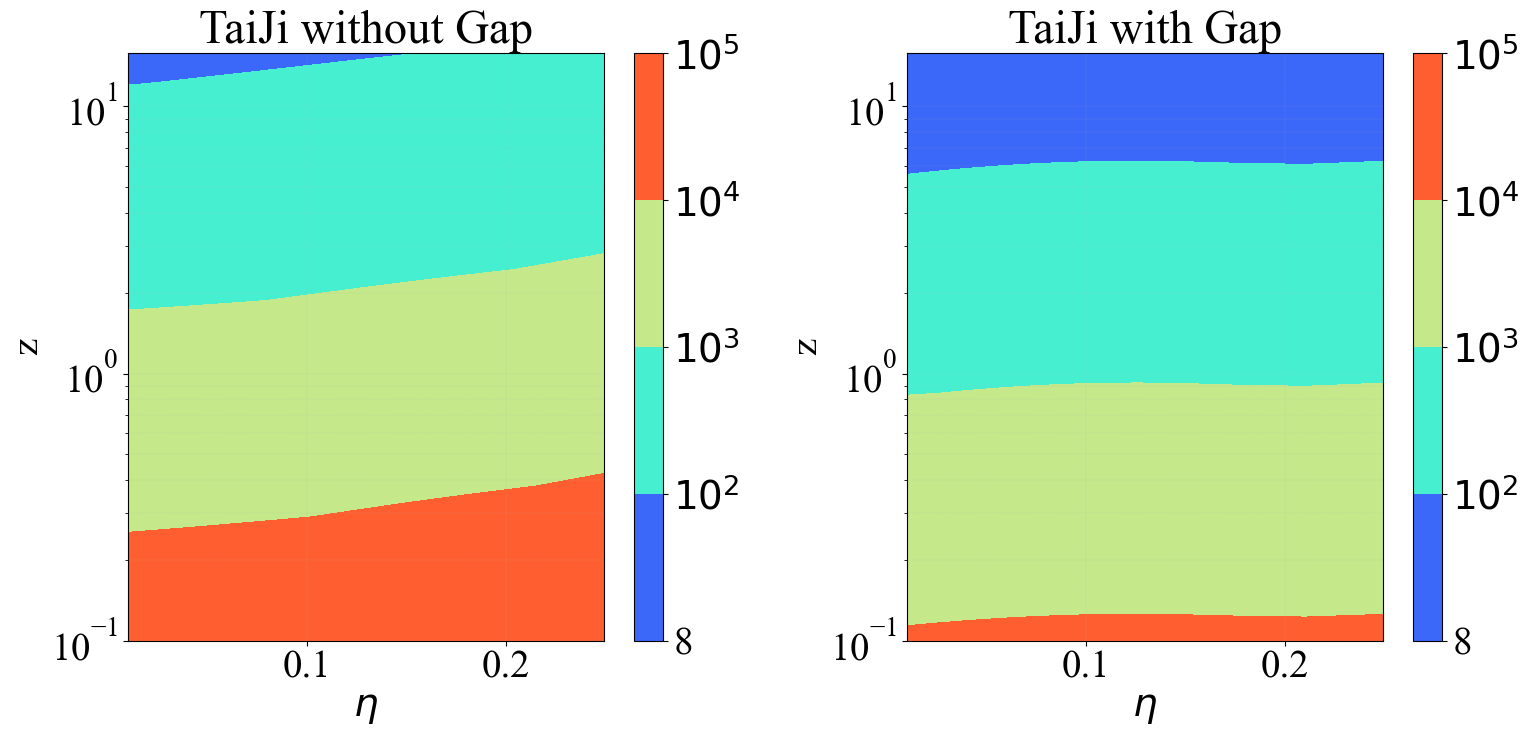

In [26]:
full_masked_tj = np.ma.masked_less(full_SNR_tj_rt, 8)
gp_masked_tj = np.ma.masked_less(gp_SNR_tj_rt, 8)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

cmap = plt.cm.rainbow  # 使用你喜欢的颜色映射
bounds = [8, 100, 1000, 10000,100000]
cf1 = ax[0].contourf(EE, ZZ, full_masked_tj, levels=bounds, cmap=cmap, norm=LogNorm(),)
#ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$\eta$')
ax[0].set_ylabel('z')
ax[0].set_title('TaiJi without Gap')
ax[0].grid(True, which="both", linestyle=':', linewidth=0.2)
# 添加颜色条
cbar1 = fig.colorbar(cf1, ax=ax[0], format=mticker.LogFormatter())

# 设置颜色条的刻度和标签格式
cbar1.set_ticks([8, 1e2, 1e3, 1e4, 1e5])
cbar1.set_ticklabels([r'8', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])

# 将 10 到 8 之间的部分设置为单独的颜色（在上面已通过 `bounds` 实现）

#cmap = plt.cm.blues  # 使用你喜欢的颜色映射
bounds = [8, 100, 1000, 10000,100000]
cf2 = ax[1].contourf(EE, ZZ, gp_masked_tj, levels=bounds, cmap=cmap, norm=LogNorm())
#ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$\eta$')
ax[1].set_ylabel('z')
ax[1].set_title('TaiJi with Gap')
ax[1].grid(True, which="both", linestyle=':', linewidth=0.2)
# 添加颜色条
cbar2 = fig.colorbar(cf2, ax=ax[1], format=mticker.LogFormatter())

# 设置颜色条的刻度和标签格式
cbar2.set_ticks([8, 1e2, 1e3, 1e4, 1e5])
cbar2.set_ticklabels([r'8',r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$'])
plt.tight_layout()
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/tj_range_ratio.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/tj_range_ratio.png")
# 显示图表

plt.show()

In [12]:
time = np.arange(1,1000,1)
len(time)
value = np.ones(len(time))
win_val = dp.win(1000,value)


In [13]:
print(win_val)

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.000000

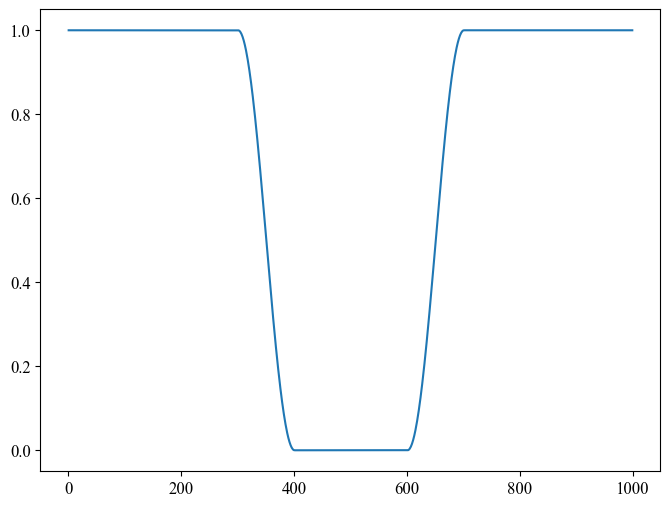

In [14]:
plt.plot(time,win_val)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


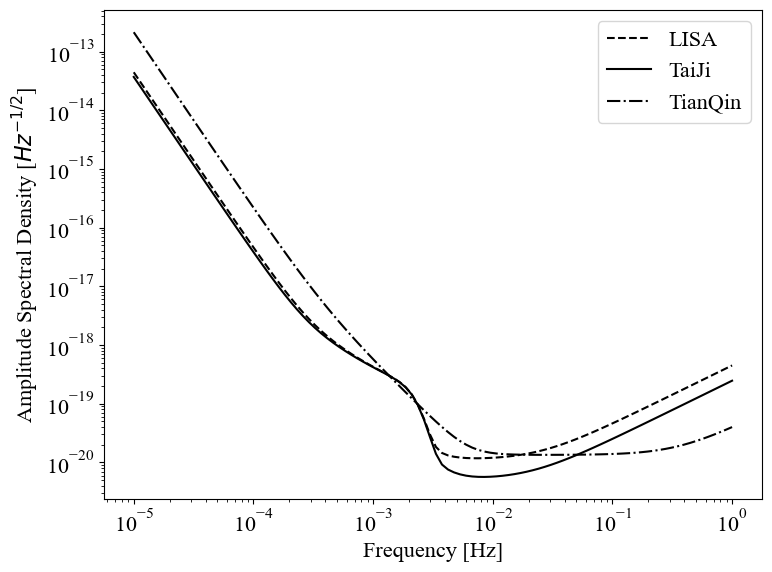

In [44]:
#灵敏度曲线
freqplot = np.logspace(-5,0,100)
plt.plot(freqplot,np.sqrt(wf.PSD_ls(freqplot)),label='LISA',color = 'black',linestyle = '--')
plt.plot(freqplot,np.sqrt(wf.PSD_tj(freqplot)),label='TaiJi',color = 'black',linestyle = '-')
plt.plot(freqplot,np.sqrt(wf.PSD_tq(freqplot)),label='TianQin',color = 'black',linestyle = '-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Amplitude Spectral Density [$Hz^{-1/2}$]')
plt.title('')
plt.legend()
plt.tight_layout()
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/sensitivity.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/sensitivity.png")
plt.show()